In [377]:
import sympy
from sympy.vector import CoordSysCartesian
sympy.init_printing()

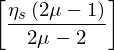

In [378]:
eta, eta_s, mu = sympy.symbols('eta eta_s mu')
sympy.solve(eta_s - 2*eta*(1-mu)/(1-2*mu), eta)

In [379]:
e = CoordSysCartesian('e')
x,y,z = sympy.symbols('x y z')
#rho, T = sympy.symbols('rho T')
#rho_p_0, r_T, r_rho, mu_max = sympy.symbols('rho_p_0 r_T r_rho mu_max')
rho = 200
T = 263.15
rho_p_0 = 300
r_T = 15
r_rho = 15
mu_max = 0.49
values = {x:0.5, y:0.5, z:0.5}

In [380]:
def rho_p(T):
    return rho_p_0 - r_T * (T - 273.15)
def mu_bar(rho, T):
    return sympy.atan((rho-rho_p(T))/r_rho)
def mu(rho, T):
    return mu_max * (mu_bar(rho, T) - mu_bar(0, T)) / (mu_bar(1000, T) - mu_bar(0, T))
rho_p(263.15),mu(rho, T)

In [387]:
def eta_s(rho, T):
    return 0.05*rho**(-0.0371*(T-273.15)+4.4)*(10e-4*sympy.exp(0.018*rho)+1)
def eta(rho, T):
    return eta_s(rho, T) * (2*mu(rho,T)- 1) / (2 * (mu(rho,T) - 2))
def lam(rho, T):
    return -(2*eta(rho, T)*mu(rho,T))/(2*mu(rho,T)-1)
eta_s(rho,T), eta(rho, T), lam(rho, T)

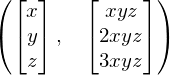

In [388]:
X = (x*e.i + y*e.j + z*e.k).to_matrix(e)
V = (x*y*z*e.i + 2*y*x*z*e.j + 3*y*x*z*e.k).to_matrix(e)
X,V

### def strain_rate(i,j):
    return 1/2.*(sympy.diff(V[i], X[j]) + sympy.diff(V[j], X[i]))
for i in range(3):
    for j in range(3):
        print 'strain({},{}) = {}'.format(i, j, strain_rate(i,j).subs(values))

In [390]:
def stress(i,j):
    sigma = 2*eta(rho, T)*strain_rate(i,j)
    if i == j:
        sigma += lam(rho, T)*(strain_rate(0,0) + strain_rate(1,1) + strain_rate(2,2))
    return sigma

In [393]:
for i in range(3):
    for j in range(3):
        print 'stress({},{}) = {:E}'.format(i, j, stress(i,j).subs(values))


stress(0,0) = 6.27933885763452E+8
stress(0,1) = 9.18384526153861E+8
stress(0,2) = 1.22451270153848E+9
stress(1,0) = 9.18384526153861E+8
stress(1,1) = 1.24019023653269E+9
stress(1,2) = 1.53064087692310E+9
stress(2,0) = 1.22451270153848E+9
stress(2,1) = 1.53064087692310E+9
stress(2,2) = 1.85244658730193E+9
